# Modeling

# Imports

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

# Previous - Preprocessing step

# Load Data

In [2]:
df_merged = pd.read_csv('/Users/swatisharma/Documents/GitHub/Capstone2_Demand_Forecast/df_merged_features.csv')
df_merged.head().T

,0,1,2,3,4
record_ID,1,2,3,4,5
week,2011-01-17,2011-01-17,2011-01-17,2011-01-17,2011-01-17
store_id,8091,8091,8091,8091,8091
sku_id,216418,216419,216425,216233,217390
total_price,99.0375,99.0375,133.95,133.95,141.075
base_price,111.8625,99.0375,133.95,133.95,141.075
is_featured_sku,0,0,0,0,0
is_display_sku,0,0,0,0,0
units_sold,20,28,19,44,52
year,2011,2011,2011,2011,2011


In [3]:
#Drop the column "week"
df_merged = df_merged.drop(['week','is_featured_sku', 'is_display_sku', 'average_price'], axis=1)


In [4]:
df_merged.shape

(150150, 10)

In [5]:
df_merged["month"].unique()

array([ 1,  7,  2,  3,  4, 11,  9,  5,  6,  8, 12, 10])

In [6]:
#Create dummy or indicator features for categorical variable "month"
result = pd.get_dummies(df_merged, columns = ["month"], prefix = "M", dtype=int)
result

,record_ID,store_id,sku_id,total_price,base_price,units_sold,year,day,revenue,M_1,...,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10,M_11,M_12
0,1,8091,216418,99.0375,111.8625,20,2011,17,4380,1,...,0,0,0,0,0,0,0,0,0,0
1,2,8091,216419,99.0375,99.0375,28,2011,17,6132,1,...,0,0,0,0,0,0,0,0,0,0
2,3,8091,216425,133.9500,133.9500,19,2011,17,4161,1,...,0,0,0,0,0,0,0,0,0,0
3,4,8091,216233,133.9500,133.9500,44,2011,17,9636,1,...,0,0,0,0,0,0,0,0,0,0
4,5,8091,217390,141.0750,141.0750,52,2011,17,11388,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,9984,223245,235.8375,235.8375,38,2013,7,8322,0,...,0,0,0,0,0,0,1,0,0,0
150146,212639,9984,223153,235.8375,235.8375,30,2013,7,6570,0,...,0,0,0,0,0,0,1,0,0,0
150147,212642,9984,245338,357.6750,483.7875,31,2013,7,6789,0,...,0,0,0,0,0,0,1,0,0,0
150148,212643,9984,547934,141.7875,191.6625,12,2013,7,2628,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
#Check if there are any nan values
result.isnull().sum(axis = 0)

record_ID      0
store_id       0
sku_id         0
total_price    1
base_price     0
units_sold     0
year           0
day            0
revenue        0
M_1            0
M_2            0
M_3            0
M_4            0
M_5            0
M_6            0
M_7            0
M_8            0
M_9            0
M_10           0
M_11           0
M_12           0
dtype: int64

In [8]:
#Drop the column "total_price"
result = result.dropna(subset = ["total_price", ])
result

,record_ID,store_id,sku_id,total_price,base_price,units_sold,year,day,revenue,M_1,...,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10,M_11,M_12
0,1,8091,216418,99.0375,111.8625,20,2011,17,4380,1,...,0,0,0,0,0,0,0,0,0,0
1,2,8091,216419,99.0375,99.0375,28,2011,17,6132,1,...,0,0,0,0,0,0,0,0,0,0
2,3,8091,216425,133.9500,133.9500,19,2011,17,4161,1,...,0,0,0,0,0,0,0,0,0,0
3,4,8091,216233,133.9500,133.9500,44,2011,17,9636,1,...,0,0,0,0,0,0,0,0,0,0
4,5,8091,217390,141.0750,141.0750,52,2011,17,11388,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,9984,223245,235.8375,235.8375,38,2013,7,8322,0,...,0,0,0,0,0,0,1,0,0,0
150146,212639,9984,223153,235.8375,235.8375,30,2013,7,6570,0,...,0,0,0,0,0,0,1,0,0,0
150147,212642,9984,245338,357.6750,483.7875,31,2013,7,6789,0,...,0,0,0,0,0,0,1,0,0,0
150148,212643,9984,547934,141.7875,191.6625,12,2013,7,2628,0,...,0,0,0,0,0,0,1,0,0,0


The M_1, M_2, ..., M_12 columns represent the one-hot encoded months.

In [9]:
#Check if there are still nan values
result.isnull().sum(axis = 0)

record_ID      0
store_id       0
sku_id         0
total_price    0
base_price     0
units_sold     0
year           0
day            0
revenue        0
M_1            0
M_2            0
M_3            0
M_4            0
M_5            0
M_6            0
M_7            0
M_8            0
M_9            0
M_10           0
M_11           0
M_12           0
dtype: int64

# Train/Test Split

Partition sizes with a 70/30 train/test split

In [10]:
len(result) * .7, len(result) * .3

(105104.29999999999, 45044.7)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(result.drop(columns='units_sold'), 
                                                    result.units_sold, test_size=0.3, 
                                                    random_state=47)

In [12]:
X_train.shape, X_test.shape

((105104, 20), (45045, 20))

In [13]:
y_train.shape, y_test.shape

((105104,), (45045,))

In [14]:
#Save the ''record_ID', 'total_price', 'revenue' columns from the train/test data into units_sold_train and units_sold_test
#Then drop those columns from `X_train` and `X_test`. Use 'inplace=True'
column_list = ['record_ID', 'total_price', 'revenue']
column_list_train = X_train[column_list]
column_list_test = X_test[column_list]
X_train.drop(columns=column_list, inplace=True)
X_test.drop(columns=column_list, inplace=True)
X_train.shape, X_test.shape

((105104, 17), (45045, 17))

In [15]:
#Check the `dtypes` attribute of `X_train` to verify all features are numeric
X_train.dtypes

store_id        int64
sku_id          int64
base_price    float64
year            int64
day             int64
M_1             int64
M_2             int64
M_3             int64
M_4             int64
M_5             int64
M_6             int64
M_7             int64
M_8             int64
M_9             int64
M_10            int64
M_11            int64
M_12            int64
dtype: object

In [16]:
#Repeat this check for the test split in `X_test`
X_test.dtypes

store_id        int64
sku_id          int64
base_price    float64
year            int64
day             int64
M_1             int64
M_2             int64
M_3             int64
M_4             int64
M_5             int64
M_6             int64
M_7             int64
M_8             int64
M_9             int64
M_10            int64
M_11            int64
M_12            int64
dtype: object

We have only numeric features in our X now!

# Initial Not-Even-A-Model

In [17]:
#Calculate the mean of `y_train`
train_mean = y_train.mean()
train_mean

51.70557733292738

sklearn's DummyRegressor does this:

In [18]:
#Fit the dummy regressor on the training data
#Hint, call its `.fit()` method with `X_train` and `y_train` as arguments
#Then print the object's `constant_` attribute and verify it's the same as the mean above
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[51.70557733]])

In [19]:
#Calculate the R^2 as defined above
def r_squared(y, ypred):
    """R-squared score.
    
    Calculate the R-squared, or coefficient of determination, of the input.
    
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    ybar = np.sum(y) / len(y) #yes, we could use np.mean(y)
    sum_sq_tot = np.sum((y - ybar)**2) #total sum of squares error
    sum_sq_res = np.sum((y - ypred)**2) #residual sum of squares error
    R2 = 1.0 - sum_sq_res / sum_sq_tot
    return R2

In [20]:
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([51.70557733, 51.70557733, 51.70557733, 51.70557733, 51.70557733])

In [21]:
r_squared(y_train, y_tr_pred)

0.0

In [22]:
y_te_pred = train_mean * np.ones(len(y_test))
r_squared(y_test, y_te_pred)

-3.0974410798467744e-06

# sklearn metrics

sklearn.metrics provides many commonly used metrics, included the ones above.

R-squared

In [23]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.0, -3.0974410798467744e-06)

Mean absolute error

In [24]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(35.373134508889166, 35.23044624963676)

Mean squared error

In [25]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(3697.8953806759732, 3454.830889700147)

Calculating metrics

In [26]:
# train set - sklearn
# correct order, incorrect order
r2_score(y_train, y_tr_pred), r2_score(y_tr_pred, y_train)

(0.0, -8.138262671692872e+30)

In [27]:
# test set - sklearn
# correct order, incorrect order
r2_score(y_test, y_te_pred), r2_score(y_te_pred, y_test)

(-3.0974410798467744e-06, -6.8429975797115925e+31)

In [28]:
# train set - using our homebrew function
# correct order, incorrect order
r_squared(y_train, y_tr_pred), r_squared(y_tr_pred, y_train)

(0.0, -8.138262671692872e+30)

In [29]:
# test set - using our homebrew function
# correct order, incorrect order
r_squared(y_test, y_te_pred), r_squared(y_te_pred, y_test)

(-3.0974410798467744e-06, -6.8429975797115925e+31)

# Initial Models

Impute missing values with median

In [30]:
# These are the values we'll use to fill in any missing values
X_defaults_median = X_train.median()
X_defaults_median

store_id        9371.0000
sku_id        222087.0000
base_price       205.9125
year            2012.0000
day               16.0000
M_1                0.0000
M_2                0.0000
M_3                0.0000
M_4                0.0000
M_5                0.0000
M_6                0.0000
M_7                0.0000
M_8                0.0000
M_9                0.0000
M_10               0.0000
M_11               0.0000
M_12               0.0000
dtype: float64

Apply the imputation to both train and test splits

In [31]:
#Call `X_train` and `X_test`'s `fillna()` method, passing `X_defaults_median` as the values to use
#Assign the results to `X_tr` and `X_te`, respectively
X_tr = X_train.fillna(X_defaults_median)
X_te = X_test.fillna(X_defaults_median)

# Scale the data

As we have features measured in many different units, with numbers that vary by orders of magnitude, we are starting off by scaling them to put them all on a consistent scale. The StandardScaler scales each feature to zero mean and unit variance.

In [32]:
#Call the StandardScaler`s fit method on `X_tr` to fit the scaler
#then use it's `transform()` method to apply the scaling to both the train and test split
#data (`X_tr` and `X_te`), naming the results `X_tr_scaled` and `X_te_scaled`, respectively
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

Train the model on the train split

In [33]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

Make predictions using the model on both train and test splits

In [34]:
#Call the `predict()` method of the model (`lm`) on both the (scaled) train and test data
#Assign the predictions to `y_tr_pred` and `y_te_pred`, respectively
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

Assess model performance

In [35]:
#Calculate r^2 - train, test
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

(0.051677915146360553, 0.05470863702122464)

In [36]:
#Now calculate the mean absolute error scores
# as we did above for R^2
# MAE - train, test
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mae

(33.71097862554845, 33.54663008365443)

In [37]:
# MSE - train, test
median_mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
median_mse

(3506.7958569732814, 3265.811684926555)

# Impute missing values with the mean

In [38]:
#As we did for the median above, calculate mean values for imputing missing values
# These are the values we'll use to fill in any missing values
X_defaults_mean = X_train.mean()
X_defaults_mean

store_id        9199.419128
sku_id        254910.859625
base_price       219.184582
year            2011.831662
day               15.685607
M_1                0.092271
M_2                0.099673
M_3                0.084716
M_4                0.092575
M_5                0.107636
M_6                0.084573
M_7                0.077105
M_8                0.068827
M_9                0.069721
M_10               0.068665
M_11               0.084450
M_12               0.069788
dtype: float64

Apply the imputation to both train and test splits

In [39]:
X_tr = X_train.fillna(X_defaults_mean)
X_te = X_test.fillna(X_defaults_mean)

Scale the data

In [40]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

Train the model on the train split

In [41]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

Make predictions using the model on both train and test splits

In [42]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

Assess model performance

In [43]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.051677915146360553, 0.05470863702122464)

In [44]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(33.71097862554845, 33.54663008365443)

In [45]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(3506.7958569732814, 3265.811684926555)

# Continue to Modeling step

# Pipelines

Define the pipeline

In [46]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    LinearRegression()
)

In [47]:
type(pipe)

sklearn.pipeline.Pipeline

In [48]:
hasattr(pipe, 'fit'), hasattr(pipe, 'predict')

(True, True)

In next step we will perform modeling and build two to three different models and identify the best one.

# Fit the pipeline

In [49]:
#Call the pipe's `fit()` method with `X_train` and `y_train` as arguments
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

Make predictions on the train and test sets

In [50]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

Assess performance

In [51]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.051677915146360553, 0.05470863702122464)

And compare with your earlier (non-pipeline) result:

In [52]:
median_r2

(0.051677915146360553, 0.05470863702122464)

In [53]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(33.71097862554845, 33.54663008365443)

Comparing it with our earlier result:

In [54]:
median_mae

(33.71097862554845, 33.54663008365443)

In [55]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(3506.7958569732814, 3265.811684926555)

Compare with your earlier result:

In [56]:
median_mse

(3506.7958569732814, 3265.811684926555)

These results confirm the pipeline is doing exactly what's expected, and results are identical to your earlier steps.

# Refining The Linear Model

# Define the pipeline

Redefine pipeline to include this feature selection step:

In [57]:
#Add `SelectKBest` as a step in the pipeline between `StandardScaler()` and `LinearRegression()`
#Don't forget to tell it to use `f_regression` as its score function
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(score_func=f_regression, k="all"),
    LinearRegression()
)

# Fit the pipeline

In [58]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x124aae7a0>)),
                ('linearregression', LinearRegression())])

Assess performance on the train and test set

In [59]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [60]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.051677915146360553, 0.05470863702122464)

In [61]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(33.71097862554845, 33.54663008365443)

# Define a new pipeline to select a different number of features

In [62]:
#Modifying the `SelectKBest` step to use a value of 12 for k
pipe12 = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(score_func=f_regression, k="all"),
    LinearRegression()
)

# Fit the pipeline

In [63]:
pipe12.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x124aae7a0>)),
                ('linearregression', LinearRegression())])

Assess performance on train and test data

In [64]:
y_tr_pred = pipe12.predict(X_train)
y_te_pred = pipe12.predict(X_test)

In [65]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.051677915146360553, 0.05470863702122464)

In [66]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(33.71097862554845, 33.54663008365443)

# Assessing performance using cross-validation

In [67]:
cv_results = cross_validate(pipe12, X_train, y_train, cv=5)

In [68]:
cv_scores = cv_results['test_score']
cv_scores

array([0.05624512, 0.04763098, 0.05123744, 0.05194717, 0.05086632])

Without using the same random state for initializing the CV folds, your actual numbers will be different.

In [69]:
np.mean(cv_scores), np.std(cv_scores)

(0.05158540624006458, 0.0027611387580309043)

In [70]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.05, 0.06])

# Hyperparameter search using GridSearchCV

In [71]:
#Call `pipe`'s `get_params()` method to get a dict of available parameters and print their names
#using dict's `keys()` method
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__keep_empty_features', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__positive'])

In [72]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

Using a built in function in sklearn, GridSearchCV to find best k.

In [73]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [74]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(k='all',
                                                    score_func=<function f_regression at 0x124aae7a0>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17]})

In [75]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [76]:
#Print the `best_params_` attribute of `lr_grid_cv`
lr_grid_cv.best_params_

{'selectkbest__k': 17}

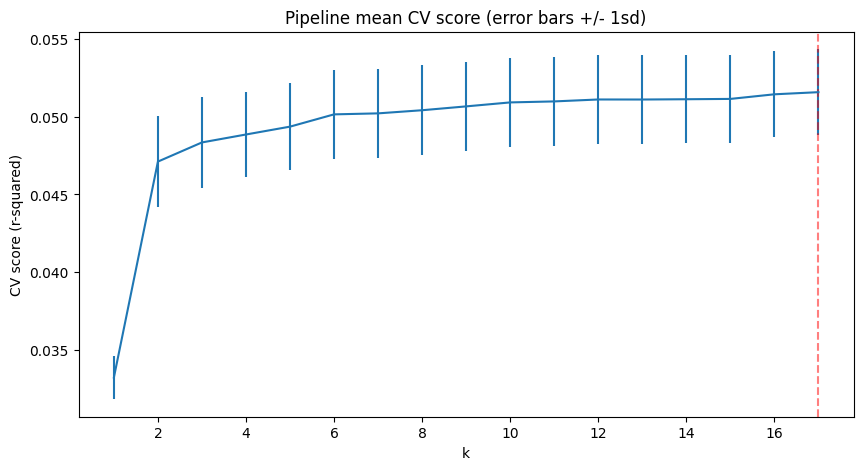

In [77]:
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

The above suggests a good value for k is 17. There was an initial rapid increase with k, followed by a constant.

In [78]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

Similarly, instead of using the 'selectkbest' named step, we can access the named step for the linear regression model and, from that, grab the model coefficients via its coef_ attribute:

In [79]:
#Get the linear model coefficients from the `coef_` attribute and store in `coefs`,
#get the matching feature names from the column names of the dataframe,
#and display the results as a pandas Series with `coefs` as the values and `features` as the index,
#sorting the values in descending order
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index= features).sort_values(ascending=False)

day          -3.504583e-01
year         -7.561044e-01
store_id     -1.274824e+00
base_price   -7.223295e+00
sku_id       -1.029462e+01
M_10         -3.237711e+13
M_8          -3.241240e+13
M_9          -3.260664e+13
M_12         -3.262104e+13
M_7          -3.415331e+13
M_11         -3.560054e+13
M_6          -3.562419e+13
M_3          -3.565146e+13
M_1          -3.705323e+13
M_4          -3.710809e+13
M_2          -3.835348e+13
M_5          -3.967954e+13
dtype: float64

These results suggest that store_id and sku_id are our biggest positives.

# Random Forest Model

# Define the pipeline

In [80]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#and then RandomForestRegressor() with a random state of 47
RF_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

# Fit and assess performance using cross-validation

In [81]:
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [82]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.6653678 , 0.67631049, 0.66031771, 0.68586341, 0.7001916 ])

In [83]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.677610203193094, 0.014343156895177794)

# Hyperparameter search using GridSearchCV

Random forest has a number of hyperparameters that can be explored, however we'll limit yourselves to exploring some different values for the number of trees.

In [84]:
#n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
n_est = [10,50,100]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10, 50, 100],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [85]:
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=3, n_jobs=-1)

In [86]:
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 50, 100],
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler': [StandardScaler(), None]})

In [87]:
#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 100,
 'simpleimputer__strategy': 'mean',
 'standardscaler': None}

It looks like imputing with the median helps, but scaling the features doesn't.

In [88]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.66381206, 0.6754777 , 0.66047899, 0.68752551, 0.70041076])

In [89]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.6775410050865546, 0.014876623887396417)

We are marginally improved upon the default CV results.

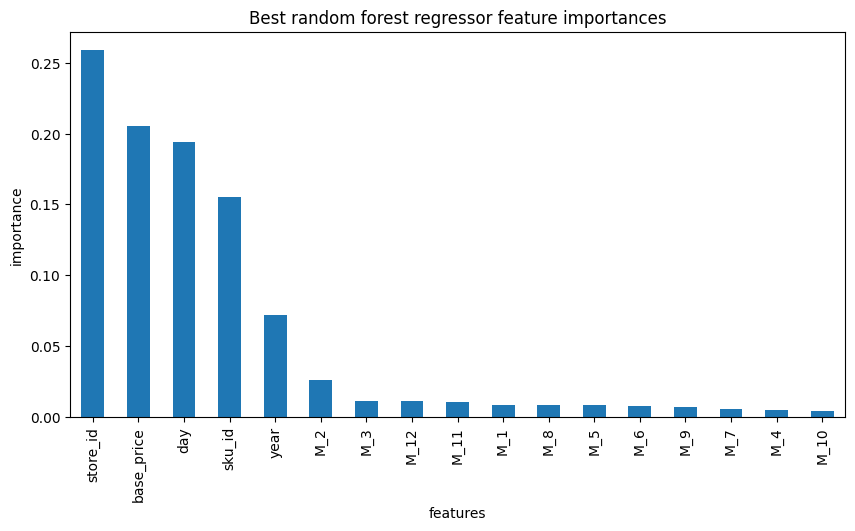

In [90]:
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

Encouragingly, the dominant top two features are store_id and base_price. day, sku_id and year also are at high bar. And, M_2 and M_12 are also somewhat dominant compared to other's months. Here, the top most dominant feature is store_id.





# ARIMA MODEL

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [92]:
# Split data into training and testing sets (80% for training, 20% for testing)
train_size = int(len(result) * 0.7)
train, test = result[:train_size], result[train_size:]

# The target variable (units_sold)
train_y = train['units_sold']
test_y = test['units_sold']

# The exogenous variables (One-hot encoded months)
train_X = train.drop(columns=['units_sold', 'record_ID', 'store_id', 'sku_id', 'total_price', 'base_price', 'units_sold', 'year', 'day', 'revenue'])
test_X = test.drop(columns=['units_sold', 'record_ID', 'store_id', 'sku_id', 'total_price', 'base_price', 'units_sold', 'year', 'day', 'revenue'])

In [93]:
# Fit ARIMA model with exogenous variables (month dummies)
# Example: ARIMA(1, 1, 1) with exogenous variables (month dummies)
arima_model = ARIMA(train_y, order=(1, 1, 1), exog=train_X)
arima_fitted = arima_model.fit()

# Print summary of the fitted ARIMA model
print(arima_fitted.summary())

                               SARIMAX Results                                
Dep. Variable:             units_sold   No. Observations:               105104
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -577477.289
Date:                Thu, 05 Dec 2024   AIC                        1154984.578
Time:                        14:05:46   BIC                        1155128.018
Sample:                             0   HQIC                       1155028.012
                             - 105104                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
M_1           -3.7216      3.047     -1.222      0.222      -9.693       2.250
M_2           -0.0099      2.280     -0.004      0.997      -4.479       4.459
M_3            2.1069      3.008      0.700      0.4

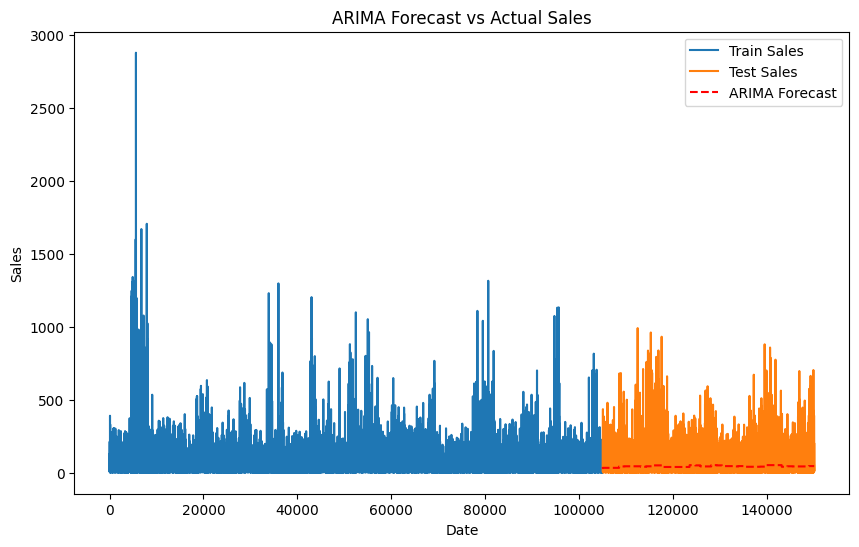

Mean Absolute Error (MAE): 33.80817696557867


In [94]:
# Make predictions for the test data
forecast_steps = len(test)
forecast = arima_fitted.forecast(steps=forecast_steps, exog=test_X)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_y.index, train_y, label='Train Sales')
plt.plot(test_y.index, test_y, label='Test Sales')
plt.plot(test_y.index, forecast, label='ARIMA Forecast', linestyle='--', color='red')
plt.title('ARIMA Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Evaluate model performance
mae = mean_absolute_error(test_y, forecast)
print(f'Mean Absolute Error (MAE): {mae}')

# Final Model Selection

# Linear regression model performance

In [95]:
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [96]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(33.71454205065457, 0.10850457873401148)

In [97]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

33.54663008365443

# Random forest regression model performance

In [98]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [99]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(16.737045060091468, 0.10398136596492666)

In [100]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

16.225888555888556

# ARIMA model performance

In [101]:
# Evaluate model performance
mae = mean_absolute_error(test_y, forecast)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 33.80817696557867


# Conclusion

The random forest model has a lower cross-validation mean absolute error with a difference of almost 18. It also exhibits less variability.

# Data quantity assessment

In [102]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

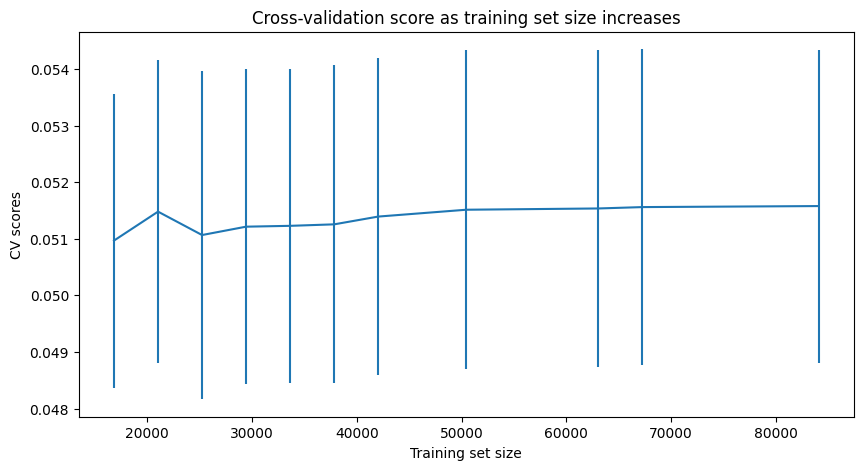

In [103]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

This shows that there's an initial rapid improvement in model scores, but it's essentially levelled off by around a sample size of 25000 - 30000.This shows that the model scores are essentially levelled off throughout.

# Save best model object from pipeline

In [104]:
#Save the best model 

best_model = rf_grid_cv.best_estimator_
best_model.version = "1.0"
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()

In [105]:
# save the model
import pickle

# save the best model as a pickle file
model_pkl_file = "best_model.pkl"  

with open(model_pkl_file, 'wb') as file:
    pickle.dump(best_model, file)

# Feature Importance

Features that came dominant in the modeling (random forest model) included:

- [ ] store_id
- [ ] sku_id
- [ ] base_price
- [ ] day
- [ ] M_2
- [ ] year
- [ ] M_12